In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = [16, 12]

NUM_CLASSES = 28
TRAIN_CSV = '/home/voyager/data/atlas/train.csv'

Get counts of single label samples:

                                     Id   Target
0  00070df0-bbc3-11e8-b2bc-ac1f6b6435d0     16 0
1  000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0
2  000a9596-bbc4-11e8-b2bc-ac1f6b6435d0        5
3  000c99ba-bba4-11e8-b2b9-ac1f6b6435d0        1
4  001838f8-bbca-11e8-b2bc-ac1f6b6435d0       18
[2414, 271, 808, 654, 1077, 983, 622, 1163, 31, 17, 0, 601, 232, 157, 484, 0, 27, 0, 314, 522, 98, 1058, 213, 1653, 122, 1470, 134, 1]
Class 17: 0
Class 15: 0
Class 10: 0
Class 27: 1
Class 9: 17
Class 16: 27
Class 8: 31
Class 20: 98
Class 24: 122
Class 26: 134
Class 13: 157
Class 22: 213
Class 12: 232
Class 1: 271
Class 18: 314
Class 14: 484
Class 19: 522
Class 11: 601
Class 6: 622
Class 3: 654
Class 2: 808
Class 5: 983
Class 21: 1058
Class 4: 1077
Class 7: 1163
Class 25: 1470
Class 23: 1653
Class 0: 2414


<BarContainer object of 28 artists>

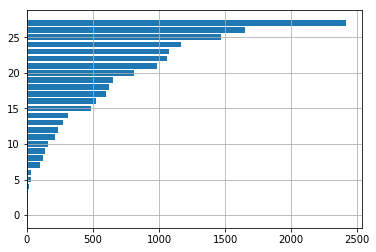

In [3]:
train_df = pd.read_csv(TRAIN_CSV)

print(train_df.head(5))

single_label_class_counts = []

for i in range(NUM_CLASSES):
    class_df = train_df[train_df['Target'] == '{}'.format(i)]
    single_label_class_counts.append(len(class_df))

print(single_label_class_counts)

sorted_indexes = np.argsort(single_label_class_counts)
sorted_counts = [single_label_class_counts[index] for index in sorted_indexes]
for i, c in zip(sorted_indexes, sorted_counts):
    print('Class {}: {}'.format(i, c))

plt.grid(True)

plt.barh(y=range(NUM_CLASSES), width=sorted_counts, left=0)

Split classes to 3 stages:
1. 0, 23, 25, 7, 4, 21, 5, 2, 3, 6, 11 - 11 large classes, could train good classifier
2. 19, 14, 18, 1, 12, 22, 13, 26, 24, 20 - 10 small classes, could train weak classifier
3. 8, 16, 9, 27, 10, 15, 17 - 7 untrainable classes
    
We could design a 2-stage ensemable classifier:
1. 2 single-label classifiers
2. multi-label classifier
    
To ensemble the results:  
  
1. average probabilities between single and multi label classifiers.  
Each of the single-label classifier may have its weight.  
  
2. Or, if single-label classifier denies a class, then multi label classifier threshold for that class should be higher.  
This might be better since score thresholds between single and multi label classifier could be inconsistent.  

Get counts of labels:

[12885, 1254, 3621, 1561, 1858, 2513, 1008, 2822, 53, 45, 28, 1093, 688, 537, 1066, 21, 530, 210, 902, 1482, 172, 3777, 802, 2965, 322, 8228, 328, 11]


<BarContainer object of 28 artists>

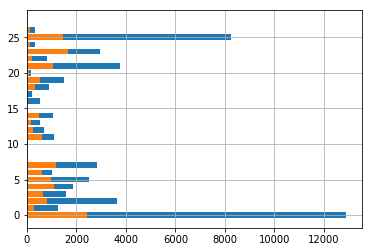

In [4]:
label_counts = [0 for i in range(NUM_CLASSES)]

for i, row in train_df.iterrows():
    target = row['Target']
    targets = target.split(' ')
    targets = [int(target) for target in targets]

    for target in targets:
        label_counts[target] += 1
        
print(label_counts)

plt.grid(True)

plt.barh(y=range(NUM_CLASSES), width=label_counts, left=0)
plt.barh(y=range(NUM_CLASSES), width=single_label_class_counts, left=0)

Sort label counts:

Class 27 - multi: 11, single: 1
Class 15 - multi: 21, single: 0
Class 10 - multi: 28, single: 0
Class 9 - multi: 45, single: 17
Class 8 - multi: 53, single: 31
Class 20 - multi: 172, single: 98
Class 17 - multi: 210, single: 0
Class 24 - multi: 322, single: 122
Class 26 - multi: 328, single: 134
Class 16 - multi: 530, single: 27
Class 13 - multi: 537, single: 157
Class 12 - multi: 688, single: 232
Class 22 - multi: 802, single: 213
Class 18 - multi: 902, single: 314
Class 6 - multi: 1008, single: 622
Class 14 - multi: 1066, single: 484
Class 11 - multi: 1093, single: 601
Class 1 - multi: 1254, single: 271
Class 19 - multi: 1482, single: 522
Class 3 - multi: 1561, single: 654
Class 4 - multi: 1858, single: 1077
Class 5 - multi: 2513, single: 983
Class 7 - multi: 2822, single: 1163
Class 23 - multi: 2965, single: 1653
Class 2 - multi: 3621, single: 808
Class 21 - multi: 3777, single: 1058
Class 25 - multi: 8228, single: 1470
Class 0 - multi: 12885, single: 2414


<BarContainer object of 28 artists>

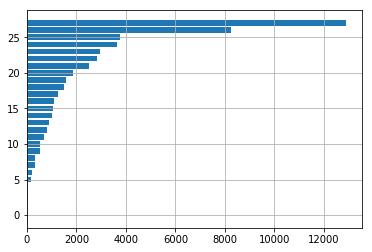

In [5]:
sorted_label_indexes = np.argsort(label_counts)
sorted_label_counts = [label_counts[i] for i in sorted_label_indexes]
for i, c in zip(sorted_label_indexes, sorted_label_counts):
    print('Class {} - multi: {}, single: {}'.format(i, c, single_label_class_counts[i]))

plt.grid(True)
plt.barh(y=range(NUM_CLASSES), width=sorted_label_counts, left=0)

Get single / total ratios of each class:

[0.18734963135428792, 0.21610845295055822, 0.22314277823805578, 0.4189622037155669, 0.5796555435952637, 0.3911659371269399, 0.6170634920634921, 0.4121190644932672, 0.5849056603773585, 0.37777777777777777, 0.0, 0.5498627630375115, 0.3372093023255814, 0.29236499068901306, 0.4540337711069418, 0.0, 0.0509433962264151, 0.0, 0.34811529933481156, 0.3522267206477733, 0.5697674418604651, 0.28011649457241194, 0.2655860349127182, 0.557504215851602, 0.37888198757763975, 0.17865824015556636, 0.40853658536585363, 0.09090909090909091]

leader boards:
Class 0 -	single: 27	multi: 27	ratio: 6
Class 1 -	single: 13	multi: 17	ratio: 7
Class 2 -	single: 20	multi: 24	ratio: 8
Class 3 -	single: 19	multi: 19	ratio: 20
Class 4 -	single: 23	multi: 20	ratio: 25
Class 5 -	single: 21	multi: 21	ratio: 17
Class 6 -	single: 18	multi: 14	ratio: 27
Class 7 -	single: 24	multi: 22	ratio: 19
Class 8 -	single: 6	multi: 4	ratio: 26
Class 9 -	single: 4	multi: 3	ratio: 15
Class 10 -	single: 2	multi: 2	ratio: 2
Class 11 -	singl

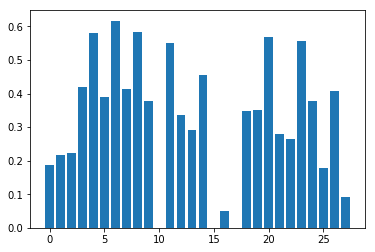

In [6]:
single_ratios = [single/label_counts[i] for i, single in enumerate(single_label_class_counts)]
print(single_ratios)

sorted_ratio_indexes = np.argsort(single_ratios)
ratio_leader = np.argsort(sorted_ratio_indexes)

plt.bar(x=range(NUM_CLASSES), height=single_ratios)

print('\nleader boards:')
single_leader = np.argsort(sorted_indexes)
multi_leader = np.argsort(sorted_label_indexes)
for i, (single, multi, ratio) in enumerate(zip(single_leader, multi_leader, ratio_leader)):
    print('Class {} -\tsingle: {}\tmulti: {}\tratio: {}'.format(i, single, multi, ratio))

In [11]:
# stratification for multi-label data
import os

from skmultilearn.model_selection import iterative_train_test_split
from skmultilearn.model_selection import IterativeStratification

# config
FOLD = 1
TAG = 'ATLAS_NO_FOLD'
VAL_RATIO = 0.05

# helper
def write_csv(tag, phase, index, samples):
    sub_dir = './{}'.format(tag)
    
    if not os.path.isdir(sub_dir):
        os.mkdir(sub_dir)
        
    filename = os.path.join(sub_dir, '{}-{}.csv'.format(phase, index))
    print('Exporting to {}...'.format(filename))
    
    with open(filename, 'w') as file:
        file.write('id\n')
        
        for sample in samples:
            file.write('{}\n'.format(sample))

# main
ids = []
targets = []

for i, row in train_df.iterrows():
    ids.append(row['Id'])
    
    labels = [int(target) for target in row['Target'].split(' ')]
    target = [1 if j in labels else 0 for j in range(NUM_CLASSES)]
    targets.append(target)
    
    if i < 5:
        print(labels, target)

indexes = np.array([[i] for i in range(len(ids))])
targets = np.array(targets)

if FOLD == 1:
    train_indexes, _, val_indexes, _ = iterative_train_test_split(
        indexes,
        targets,
        test_size = VAL_RATIO
    )
    
    print('Training set size: {}, val set size: {}'.format(
        train_indexes.shape[0],
        val_indexes.shape[0])
    )
    
    train_samples = [ids[i[0]] for i in train_indexes]
    val_samples = [ids[i[0]] for i in val_indexes]
    
    write_csv(TAG, 'train', 0, train_samples)
    write_csv(TAG, 'val', 0, val_samples)
else:
    k_fold = IterativeStratification(n_splits=FOLD, order=1)
    
    train_samples_list = []
    val_samples_list = []
    
    for train_indexes, val_indexes in k_fold.split(indexes, targets):
        train_samples_list.append([ids[i] for i in train_indexes])
        val_samples_list.append([ids[i] for i in val_indexes])
        
    for i, (train_samples, val_samples) in enumerate(zip(train_samples_list, val_samples_list)):
        write_csv(TAG, 'train', i, train_samples)
        write_csv(TAG, 'val', i, val_samples)

# write class_weight
total_count = np.sum(label_counts)
class_weights =  1 - np.array(label_counts) / total_count
print('class weights:')
        
filename = os.path.join('./{}'.format(TAG), 'class_weight.csv')
with open(filename, 'w') as csv_file:
    csv_file.write('class,weight\n')
    
    for i, weight in enumerate(class_weights):
        print('class {}: {}'.format(i, weight))
        csv_file.write('{},{}\n'.format(i, weight))
        
print('Done')

[16, 0] [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[7, 1, 2, 0] [1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[5] [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1] [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[18] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Training set size: 29535, val set size: 1537
Exporting to ./ATLAS_NO_FOLD/train-0.csv...
Exporting to ./ATLAS_NO_FOLD/val-0.csv...
class weights:
class 0: 0.7462683628057185
class 1: 0.9753062108621166
class 2: 0.9286952069630972
class 3: 0.969260761687212
class 4: 0.9634122326808712
class 5: 0.9505139616399512
class 6: 0.9801504470087826
class 7: 0.944429128431334
class 8: 0.9989563231066125
class 9: 0.9991138592414636
class 10: 0.9994486235280218
class 11: 0.9784766255759915
class 12: 0.9864518924028199
class 13: 0.9894253869481312
c

Randomly load and show some samples:

Plotting - Id: ecf7e9b4-bbc2-11e8-b2bc-ac1f6b6435d0 Target: 23
Plotting - Id: 27901190-bbc9-11e8-b2bc-ac1f6b6435d0 Target: 12 25 21
Plotting - Id: d4df2f02-bbb0-11e8-b2ba-ac1f6b6435d0 Target: 5
Plotting - Id: 2ced0ad2-bba4-11e8-b2b9-ac1f6b6435d0 Target: 6


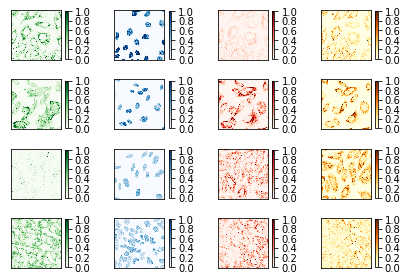

In [8]:
import random

import skimage.io
import skimage.transform
import skimage.color
import skimage

from PIL import Image

# config
IMG_PATH = '/home/voyager/data/atlas/train'
IMG_COLORS = [
    'green', # protein of interest
    'blue', # nucleus
    'red', # microtubules
    'yellow', # endoplasmic reticulum
]
COLOR_MAPS = [
    'Greens',
    'Blues',
    'Reds',
    'YlOrBr'
]

# helper
def load_image(filename):
    img = skimage.io.imread(filename)
    
    return img.astype(np.float32) / 255.0

def plot_samples(sample_ids):
    plt.ion()
    f, axs = plt.subplots(len(img_ids), len(IMG_COLORS))

    for i, img_id in enumerate(img_ids):
        print('Plotting - Id: {} Target: {}'.format(img_id, train_df[train_df['Id'] == img_id].iloc[0]['Target']))

        for j, color_name in enumerate(IMG_COLORS):
            img_filename = os.path.join(IMG_PATH, '{}_{}.png'.format(img_id, color_name))
            img = load_image(img_filename)

            im = axs[i, j].imshow(img, cmap=COLOR_MAPS[j])
            axs[i, j].set_xticks([])
            axs[i, j].set_yticks([])

            f.colorbar(im, ax=axs[i, j], shrink=0.95)

    plt.tight_layout()
    plt.ioff()

    plt.show()

# main
img_ids = random.sample(ids, 4)
plot_samples(img_ids)


Test dataset:

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 0]])
tensor([[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
         0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 0]])
tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
         0, 0, 0]

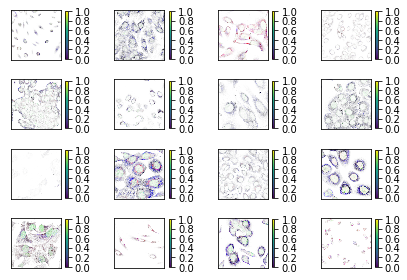

In [9]:
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader

from atlas import CsvDataset, collater

SAMPLE_COUNT = 4
NUM_WORKERS = 4
IMAGE_SIZE = 512
num_classes = 27
batch_size = 4

train_file = './ATLAS_4_FOLD/train-0.csv'
val_file = './ATLAS_4_FOLD/val-0.csv'
data_root = '/home/voyager/data/atlas/'

def plot_batchs(batchs):
    batch_count = len(batchs)
    batch_size = batchs[0]['images'].shape[0]
    
    plt.ion()
    f, axs = plt.subplots(batch_count, batch_size)
    
    for i, batch in enumerate(batchs):
        for j, image in enumerate(batch['images']):
            image = image.permute(1, 2, 0)
            
            im = axs[i, j].imshow(image.cpu().numpy())
            axs[i, j].set_xticks([])
            axs[i, j].set_yticks([])

            f.colorbar(im, ax=axs[i, j], shrink=0.95)
        
    plt.tight_layout()
    plt.ioff()

    plt.show()

train_augmentations = transforms.Compose([
    transforms.RandomVerticalFlip(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15, resample=2),
    transforms.RandomResizedCrop(IMAGE_SIZE, scale=(0.9, 1), ratio=(0.9, 1.1)),
    transforms.ToTensor()
])
val_augmentations = transforms.Compose([
    transforms.ToTensor()
])

train_set = CsvDataset(
    csv_path=train_file,
    data_root=data_root,
    num_classes=num_classes,
    phase='train',
    label='multi',
    augment=train_augmentations
)
val_set = CsvDataset(
    csv_path=val_file,
    data_root=data_root,
    num_classes=num_classes,
    phase='val',
    label='multi',
    augment=val_augmentations
)

train_loader = DataLoader(
    dataset=train_set,
    batch_size=batch_size,
    shuffle=True,
    collate_fn=collater,
    num_workers=NUM_WORKERS
)
val_loader = DataLoader(
    dataset=val_set,
    batch_size=batch_size,
    shuffle=False,
    collate_fn=collater,
    num_workers=NUM_WORKERS
)

batchs = []
for i, samples in enumerate(train_loader):
    batchs.append(samples)
    print(samples['annos'])
    
    if i == SAMPLE_COUNT - 1:
        break
        
plot_batchs(batchs)
